### Numpy生成伪随机数

In [1]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
npr.seed(100)
np.set_printoptions(precision=4)        # 固定种子以便重现，固定打印输出的位数

print(npr.rand(10))                     # 一维ndarray对象形式的均匀分布的随机数
print()
print(npr.rand(5, 5))                   # 二维

[0.5434 0.2784 0.4245 0.8448 0.0047 0.1216 0.6707 0.8259 0.1367 0.5751]

[[0.8913 0.2092 0.1853 0.1084 0.2197]
 [0.9786 0.8117 0.1719 0.8162 0.2741]
 [0.4317 0.94   0.8176 0.3361 0.1754]
 [0.3728 0.0057 0.2524 0.7957 0.0153]
 [0.5988 0.6038 0.1051 0.3819 0.0365]]


In [3]:
a = 5
b = 10
print(npr.rand(10) * (b-a) + a)
print()
print(npr.rand(5,5) * (b-a) + a)

[9.4521 9.9046 5.2997 9.4527 7.8845 8.7124 8.1509 7.9092 5.1022 6.0501]

[[7.7234 8.8456 6.2535 6.4295 9.262 ]
 [9.875  9.4243 6.7975 7.9943 6.774 ]
 [6.701  5.8904 6.1885 5.2243 7.5272]
 [6.8813 7.964  8.1497 5.713  9.6692]
 [9.7319 8.0115 6.9388 6.8159 6.0217]]


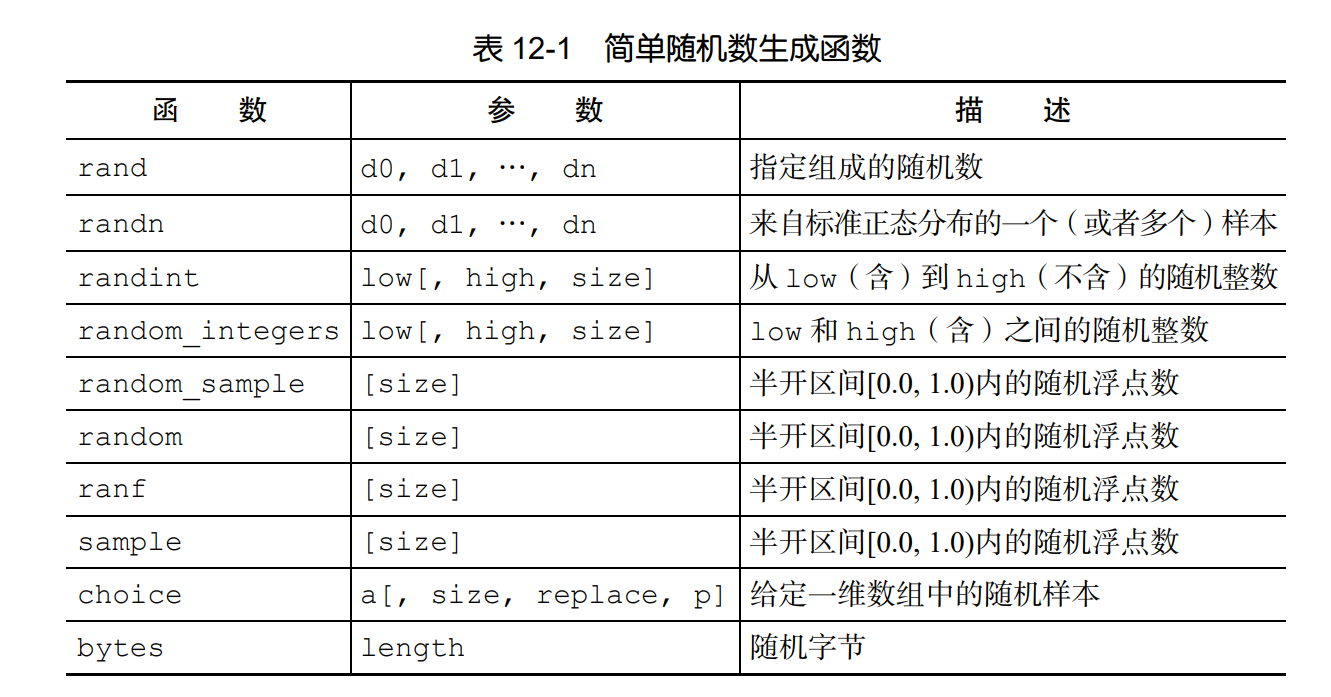

Text(0.5, 1.0, 'choice')

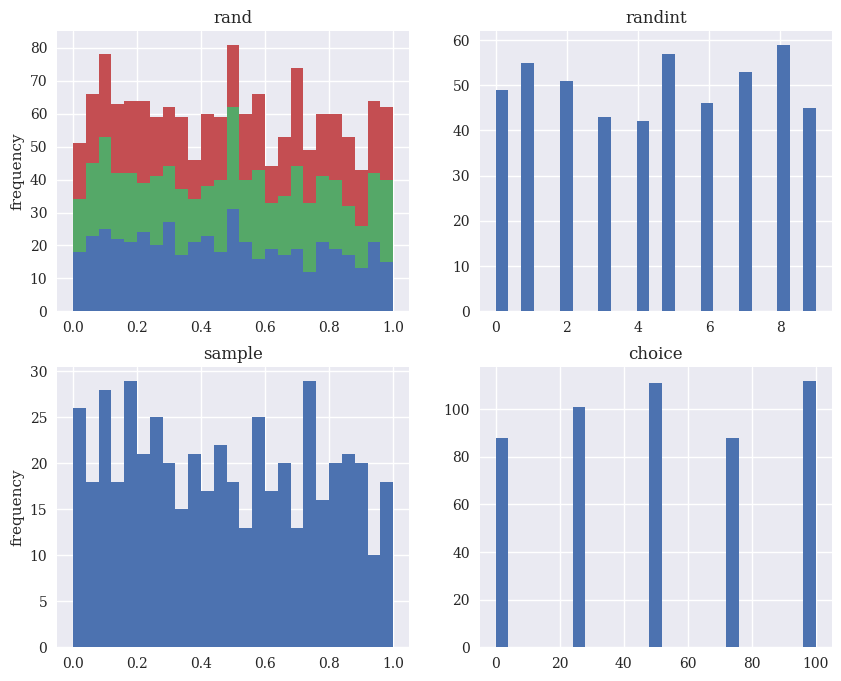

In [4]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0, 10, sample_size)
rn3 = npr.sample(size=sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

    # When you create subplots with plt.subplots(nrows=2, ncols=2), it returns a figure and a 2D array of axes. 
    # The notation ((ax1, ax2), (ax3, ax4)) allows you to unpack this 2D array into individual variables (ax1, ax2, ax3, ax4) in a single line.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
    # ax1, ax2, ax3, and ax4 are variables representing individual subplot axes. 
    # The plt.subplots() function creates a figure and a set of subplots arranged in a grid. 
    # The (2, 2) argument specifies a 2x2 grid (2 rows and 2 columns) of subplots.
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')

ax2.hist(rn2, bins=25)
ax2.set_title('randint')

ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')

ax4.hist(rn4, bins=25)
ax4.set_title('choice')

Text(0.5, 1.0, 'poisson')

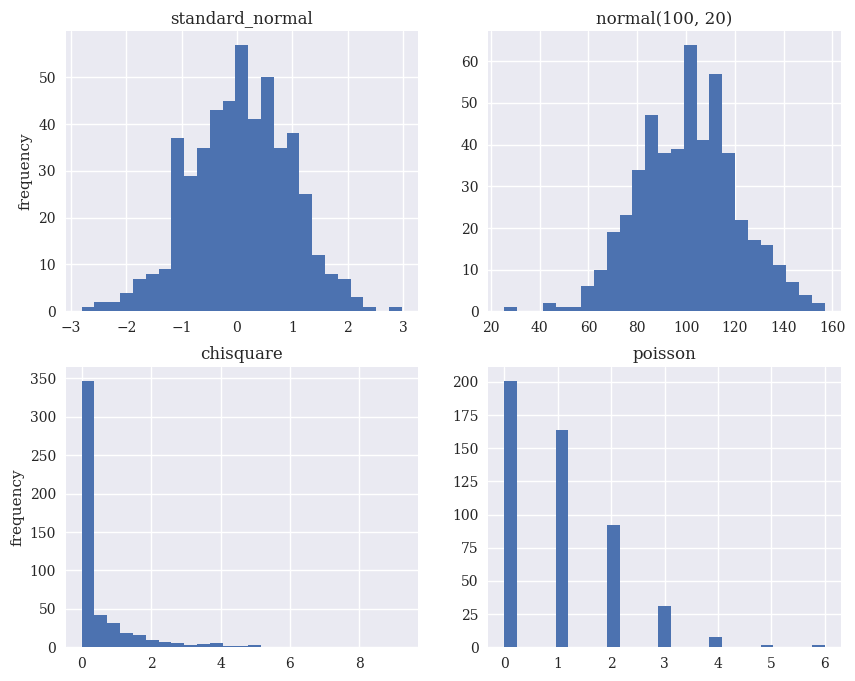

In [5]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)          # 均值100，方差20的正态
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1, size=sample_size)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard_normal')
ax1.set_ylabel('frequency')

ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')

ax3.hist(rn3, bins=25)
ax3.set_title('chisquare')
ax3.set_ylabel('frequency')

ax4.hist(rn4, bins=25)
ax4.set_title('poisson')

### 模拟

####  蒙特卡洛模拟

通过npr.standard_normal() 统计模拟的几何布朗运动

Text(0, 0.5, 'frequency')

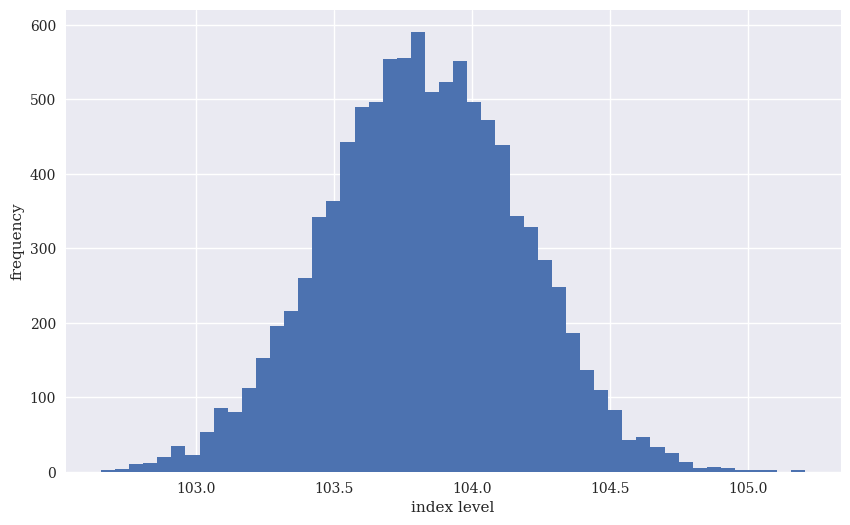

In [6]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r-0.5*sigma**2)*T) + sigma * math.sqrt(T) * npr.standard_normal(I)

plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
    # plt.xlabel 和 plt.ylabel 就足够了。如果你在多个子图中绘制，或者想要更精细地控制每个子图的标签，那么使用 ax.set_xlabel 和 ax.set_ylabel 会更合适。

Text(0, 0.5, 'frequency')

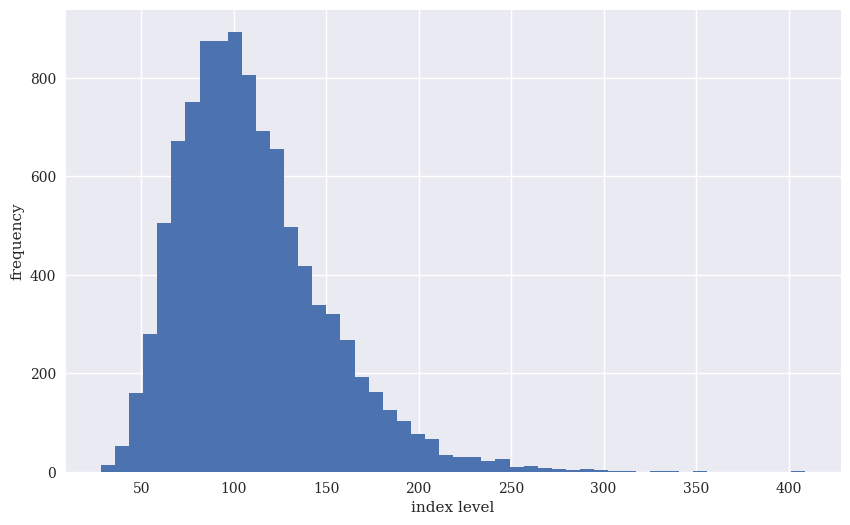

In [7]:
ST2 = S0 * npr.lognormal((r-0.5*sigma**2)*T, sigma*math.sqrt(T), size=I)

plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [18]:
sta1 = scs.describe(ST1)
sta1

DescribeResult(nobs=10000, minmax=(102.65444510209088, 105.20638622835213), mean=103.82317821550413, variance=0.12509060522037777, skewness=-0.006379408594721384, kurtosis=-0.07791785358109138)

In [9]:
import scipy.stats as scs

def print_statistic(a1, a2):
    ''' prints selected statistics.
    
    parameters —— a1, a2:ndarray objects; results objects from simulation 

    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' % ('statistic', 'data set 1', 'data set 2'))
    print(45 * '-')
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

print_statistic(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min        102.654         28.230
           max        105.206        409.110
          mean        103.823        110.431
           std          0.354         39.878
          skew         -0.006          1.115
      kurtosis         -0.078          2.217


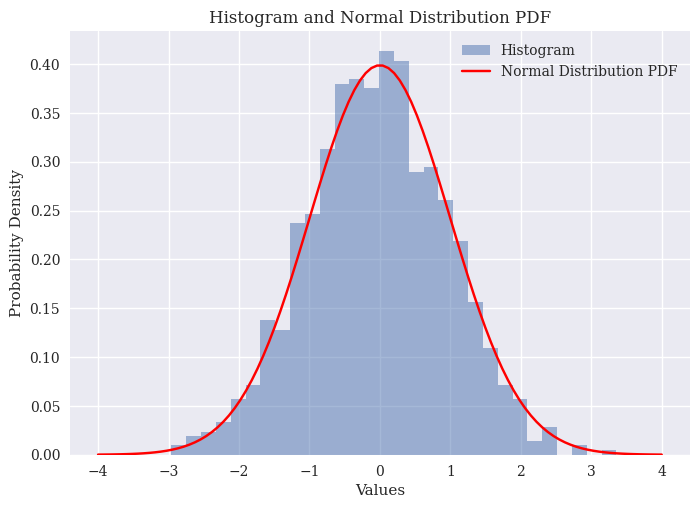

In [10]:
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy as np

# Generate a random sample from a normal distribution
mean = 0
std_dev = 1
sample_size = 1000
random_sample = np.random.normal(mean, std_dev, sample_size)

# Calculate the probability density function (PDF) for the normal distribution
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
pdf_values = scs.norm.pdf(x, loc=mean, scale=std_dev)           # loc均值，scale标准差

# Plot the histogram of the random sample
plt.hist(random_sample, bins=30, density=True, alpha=0.5, label='Histogram')

# Plot the probability density function (PDF) of the normal distribution
plt.plot(x, pdf_values, label='Normal Distribution PDF', color='red')

plt.title('Histogram and Normal Distribution PDF')
plt.xlabel('Values')
plt.ylabel('Probability Density') 
plt.legend()
plt.show()


#### 随机过程

几何布朗运动SDE

Text(0, 0.5, 'frequency')

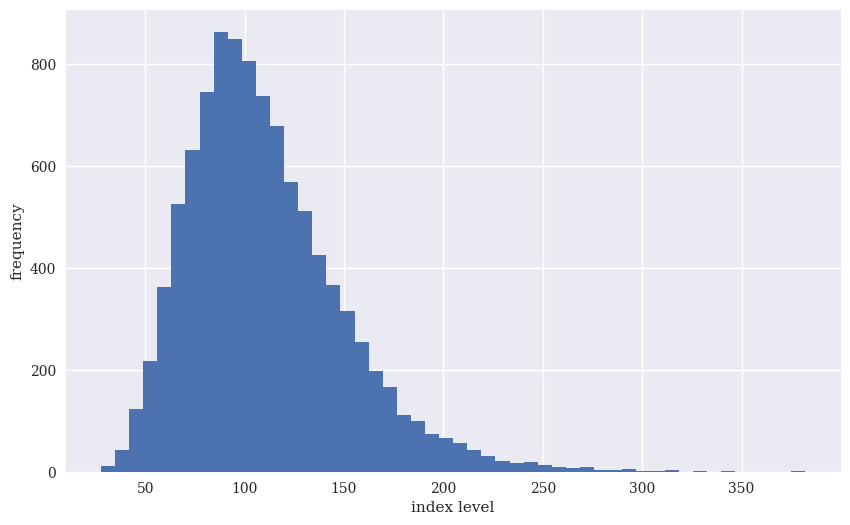

In [11]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M+1, I))
S[0] = S0
for t in range(1, M+1):
    S[t] = S[t-1]*np.exp((r-0.5*sigma**2)*dt + sigma*math.sqrt(dt)*npr.standard_normal(I))

plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [12]:
print_statistic(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.746         28.230
           max        382.096        409.110
          mean        110.429        110.431
           std         39.176         39.878
          skew          1.072          1.115
      kurtosis          2.061          2.217


In [13]:
S[:, :10]

array([[100.    , 100.    , 100.    , 100.    , 100.    , 100.    ,
        100.    , 100.    , 100.    , 100.    ],
       [ 99.4777, 102.1629, 107.354 , 103.8697, 104.8852,  95.4207,
        101.7427, 102.4338, 105.2319,  97.1263],
       [ 94.5503,  97.1893, 113.2173, 106.3034, 108.3158,  93.3687,
        107.3461, 102.9343, 108.0594,  90.7995],
       [ 96.1283, 104.2157, 119.338 , 108.5187, 101.9011,  84.5042,
         98.1345, 101.2385, 110.0833,  94.1427],
       [101.7573, 111.3228, 115.6675, 116.8607, 103.481 ,  76.8041,
         94.3997, 101.9324, 110.1444, 103.3347],
       [ 96.1422, 109.2868, 116.6577, 117.8384, 105.1841,  82.2981,
         99.0561, 107.6389, 105.7496,  98.7446],
       [ 95.8265, 112.5465, 121.767 , 126.9376, 110.5778,  71.7455,
         99.2442, 110.3115, 110.4126, 104.3114],
       [ 98.9555, 112.8799, 116.5622, 123.2738, 118.0684,  65.2653,
        101.4372, 113.0475, 100.7135, 100.3226],
       [102.3303, 126.9581, 115.3779, 135.71  , 115.5314,  63.30

Text(0, 0.5, 'index level')

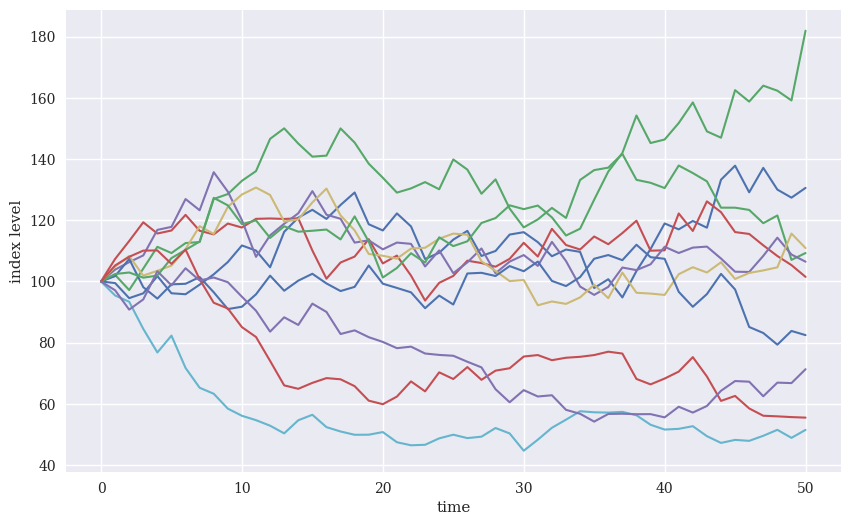

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

平方根扩散

Text(0, 0.5, 'frequency')

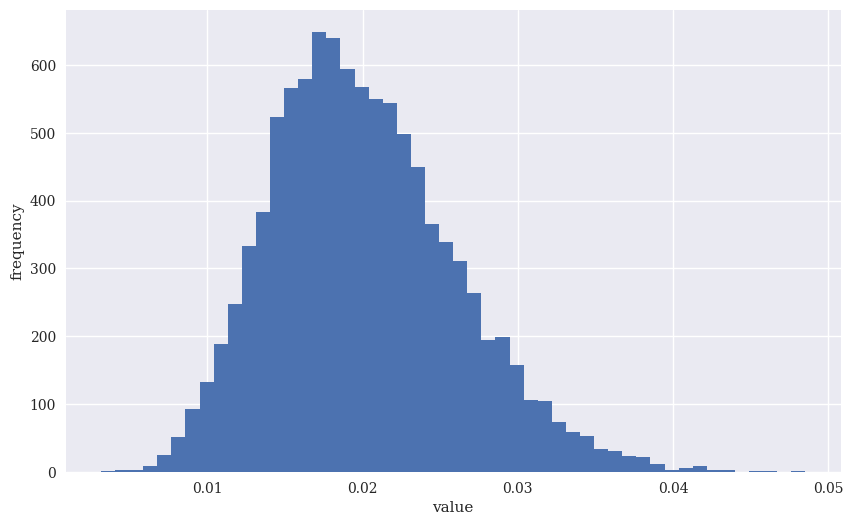

In [15]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1
I = 10000
M = 50
dt = T/M

def srd_euler():
    xh = np.zeros((M+1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M+1):
        xh[t] = (xh[t-1] + kappa*(theta-np.maximum(xh[t-1], 0))*dt + 
            sigma*np.sqrt(np.maximum(xh[t-1], 0))*math.sqrt(dt)*npr.standard_normal(I))
    x = np.maximum(xh, 0)
    return x

x1 = srd_euler()

plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Text(0, 0.5, 'index level')

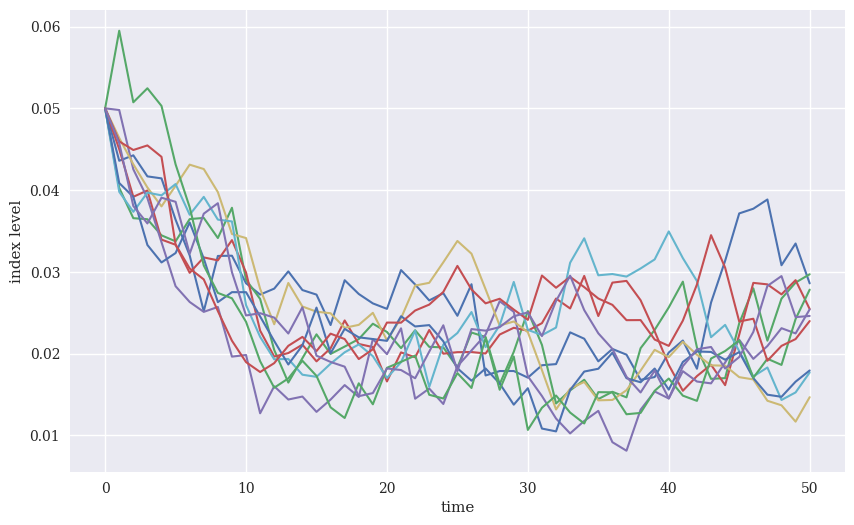

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

Text(0, 0.5, 'frequency')

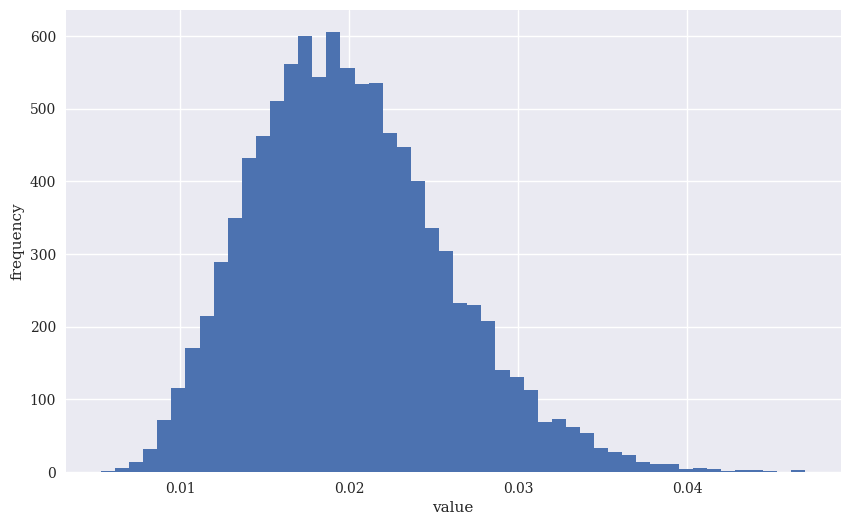

In [17]:
def srd_exact():
    x = np.zeros((M+1, I))
    x[0] = x0
    for t in range(1, M+1):
        df = 4*theta*kappa/sigma**2
        c = (sigma**2 * (1-np.exp(-kappa*dt))) / (4*kappa)
        nc =  np.exp(-kappa*dt) / c*x[t-1]
        x[t] = c*npr.noncentral_chisquare(df, nc, size=I)
    return x

x2 = srd_exact()

plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')


随机波动率

In [20]:
S0 = 100.
r = 0.05 
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)          # 两个布朗运动之间的固定相关系数
    # Cholesky 分解是一种将一个正定矩阵分解为一个下三角矩阵和其转置的方法。对于一个正定矩阵 A，Cholesky 分解将其表示为 A = L @ L.T，其中 L 是一个下三角矩阵

cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])